In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 1943 MCP 뉴런

In [3]:
x = np.array([0.1, 0.2])
w = np.array([0.3, 0.4])

In [6]:
z = np.sum(x*w)

In [7]:
b = 0.3
y = 1 if z > b else -1

In [8]:
y

-1

MCP 뉴런 논리회로

In [10]:
def test(logic):
    for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

In [50]:
def 취합(x, w, b):
    z = np.sum(x*w) + b
    return z

def 활성화(z):
    y = 1 if z > 0 else -1
    return y

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    # MCP 뉴런
    z = 취합(x, w, b)
    y = 활성화(z)
    return y

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    z = 취합(x, w, b)
    y = 활성화(z)
    return y

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    z = 취합(x, w, b)
    y = 활성화(z)
    return y

In [21]:
test(AND)

0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1


In [22]:
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | 0


In [23]:
test(OR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1


## 1958 퍼셉트론

In [103]:
# %load perceptron.py
import numpy as np

def 취합(X, w, b):
    z = np.dot(X, w) + b
    return z

def 활성화(z):
    y = np.where(z > 0, 1, -1)
    return y

class 뉴런:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
    def predict(self, x):
        z = 취합(x, self.w, self.b)
        y = 활성화(z)
        return y
    
class 퍼셉트론(뉴런):
    def __init__(self):
        super().__init__(w=None, b=None)
    
    def fit(self, X, y, 학습횟수, 학습률=0.01):
        # 가중치 초기화
        샘플수, 특징수 = X.shape
        self.w = np.zeros(특징수)
        self.b = 0.0
        
        error_history = []
        for i in range(학습횟수):
            종합오류 = 0
            for xi, yi in zip(X, y):
                yi_pred = self.predict(xi)
                error = yi - yi_pred
                종합오류 += error**2
                # 가중치 갱신
                update = error * 학습률
                self.w += update * xi
                self.b += update
            error_history.append(종합오류)
            
        return error_history

퍼셉트론 평가

In [104]:
iris = pd.read_csv('data/iris.data', header=None)

In [105]:
data1 = iris[:100]

In [106]:
data1[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: 4, dtype: int64

In [107]:
y = data1[4].values
X = data1.iloc[:, 0:4].values.astype('float')

In [108]:
y = np.where(y == 'Iris-setosa', 1, -1)

In [109]:
np.unique(y)

array([-1,  1])

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [112]:
model = 퍼셉트론()

In [113]:
error_history = model.fit(X_train, y_train, 학습횟수=10)

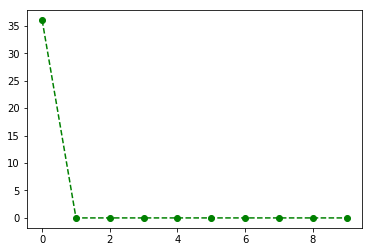

In [114]:
plt.plot(error_history, color='g', marker='o', linestyle='--')

In [115]:
model.w, model.b

(array([ 0.052,  0.122, -0.17 , -0.082]), 0.02)

In [116]:
y_pred = model.predict(X_test)

In [119]:
np.mean(y_pred == y_test)

1.0

#### 연습

iris.data의 나머지 두 개 분류에 대해 퍼셉트론을 훈련하고 평가해 봅시다.

In [120]:
data2 = iris[50:]

In [121]:
data2[4].value_counts()

Iris-virginica     50
Iris-versicolor    50
Name: 4, dtype: int64

In [122]:
y = data2[4]
y = np.where(y == 'Iris-virginica', 1, -1)

In [124]:
X = data2.iloc[:, 0:4].values.astype('float')

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [127]:
model = 퍼셉트론()

In [129]:
error_history = model.fit(X_train, y_train, 학습횟수=10)

(0, 150)

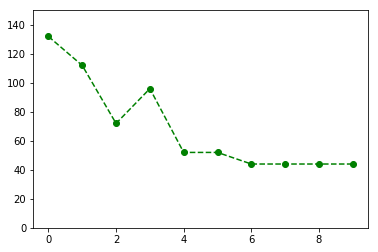

In [131]:
plt.plot(error_history, 'go--')
plt.ylim(0, 150)

In [132]:
y_pred = model.predict(X_test)

In [133]:
np.mean(y_pred == y_test)

0.80000000000000004

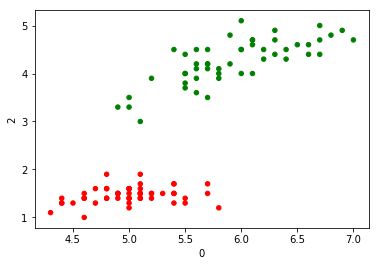

In [137]:
colormap = np.where(data1[4] == 'Iris-setosa', 'r', 'g')
data1.plot(kind='scatter', x=0, y=2, c=colormap)

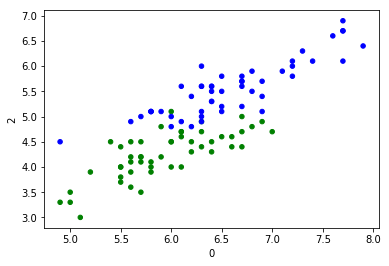

In [138]:
colormap = np.where(data2[4] == 'Iris-versicolor', 'g', 'b')
data2.plot(kind='scatter', x=0, y=2, c=colormap)

In [139]:
from sklearn.linear_model import LogisticRegression

In [142]:
y = data2[4]
X = data2.iloc[:, 0:4]

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [148]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
np.mean(y_pred == y_test)

0.95999999999999996

In [149]:
예측확률 = model.predict_proba(X_test)

In [151]:
pd.DataFrame(예측확률)

,0,1
0,0.223111,0.776889
1,0.114748,0.885252
2,0.321425,0.678575
3,0.899824,0.100176
4,0.897585,0.102415
5,0.909389,0.090611
6,0.417790,0.582210
7,0.130024,0.869976
8,0.727323,0.272677
9,0.131283,0.868717


In [159]:
y = iris[4]
X = iris.iloc[:, 0:4]

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression().fit(X_train, y_train)

예측확률 = logreg.predict_proba(X_test)
pd.DataFrame(예측확률, columns=np.unique(y))

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.105219,0.741673,0.153108
1,0.014784,0.642684,0.342532
2,0.001063,0.170374,0.828563
3,0.000299,0.411084,0.588617
4,0.044515,0.756619,0.198866
5,0.881533,0.118442,0.000025
6,0.042360,0.629534,0.328106
7,0.042177,0.741807,0.216016
8,0.695617,0.303918,0.000465
9,0.000796,0.388946,0.610257


### 활성화 함수

In [160]:
def step(x):
    return np.where(x > 0, 1, -1)

In [163]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [166]:
def relu(x):
    return np.maximum(0, x)

In [161]:
x = np.arange(-5, 5, 0.1)

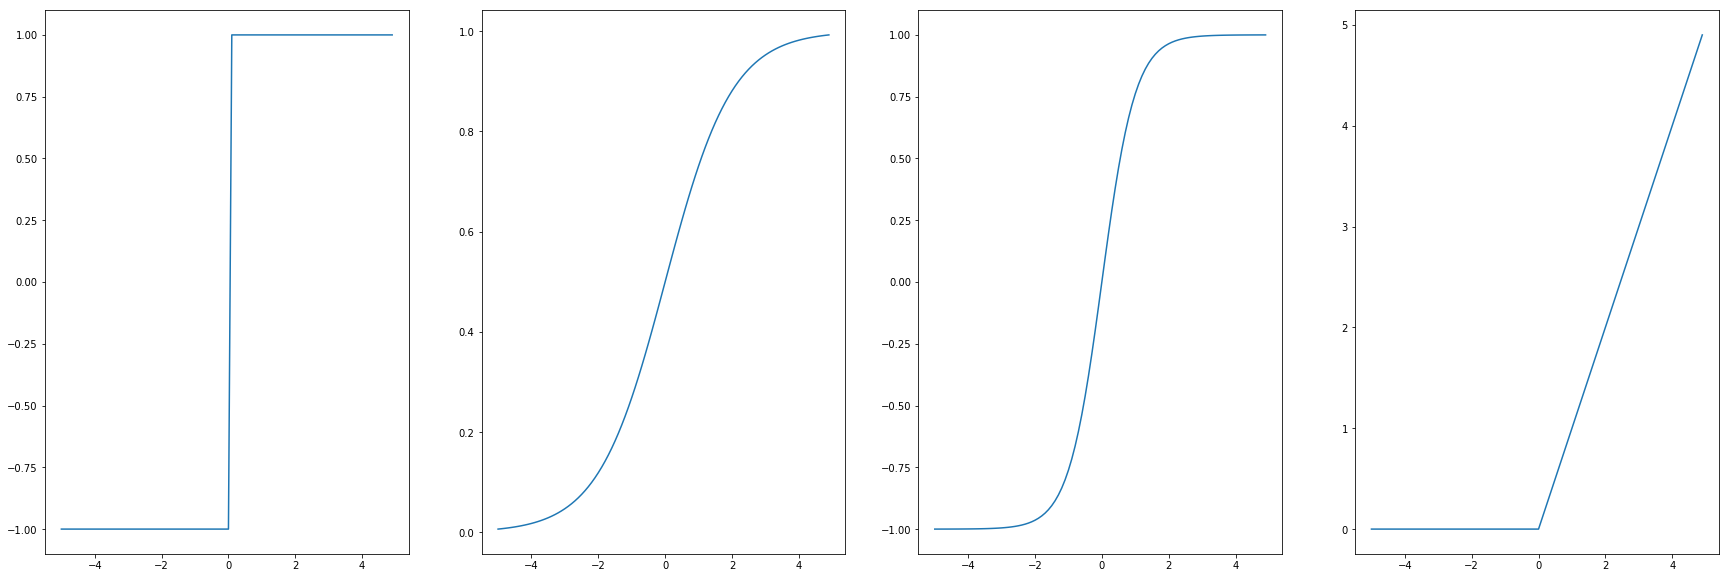

In [179]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10))
axes[0].plot(x, step(x))
axes[1].plot(x, sigmoid(x))
axes[2].plot(x, np.tanh(x))
axes[3].plot(x, relu(x))

### 신경망 순전파

입력으로부터 출력이 전달되는 것을 순전파(feed forward)라고 합니다.

In [180]:
x = np.array([1.0, 0.5])

In [183]:
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])

In [182]:
b1 = np.array([0.1, 0.2, 0.3])

In [187]:
z1 = np.dot(x, W1) + b1
z1

array([ 0.3,  0.7,  1.1])

In [188]:
a1 = sigmoid(z1)
a1

array([ 0.57444252,  0.66818777,  0.75026011])

In [186]:
W2 = np.array([[0.1, 0.4], 
               [0.2, 0.5], 
               [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

In [189]:
z2 = np.dot(a1, W2) + b2
z2

array([ 0.51615984,  1.21402696])

In [190]:
a2 = sigmoid(z2)
a2

array([ 0.62624937,  0.7710107 ])

In [191]:
W3 = np.array([[0.1, 0.3], 
               [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

In [192]:
z3 = np.dot(a2, W3) + b3
z3

array([ 0.31682708,  0.69627909])

In [200]:
np.sum(z3)

1.0131061662729968

#### 출력 처리

In [193]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    y = exp_a / np.sum(exp_a)
    return y

In [198]:
a = np.array([-0.3, 2.9, 4.0])
y = softmax(a)
y

array([ 0.01007736,  0.24722318,  0.74269946])

In [199]:
np.sum(y)

1.0

In [201]:
softmax(z3)

array([ 0.40625907,  0.59374093])

### 손글씨 숫자 인식

In [257]:
from deepy.dataset import mnist

In [258]:
(X_train, y_train), (X_test, y_test) = \
    mnist.load_mnist(flatten=False, normalize=False)

In [204]:
X_train.shape

(60000, 1, 28, 28)

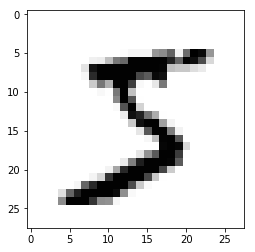

In [208]:
x1 = X_train[0]
x1 = x1.reshape(28, 28)

plt.imshow(x1, 'Greys')

In [209]:
y_train[0]

5

각 샘플을 벡터로 만들기

In [259]:
X_train = X_train.reshape(-1, 1*28*28)
X_test = X_test.reshape(-1, 1*28*28)

In [212]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [213]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

원-핫-인코딩

In [215]:
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values

In [216]:
Y_train.shape

(60000, 10)

### 신경망 구성

In [ ]:
# %load neuralnet.py
import numpy as np

class Layer:
    def __init__(self, 입력수, 출력수, 활성화):
        self.W = np.random.randn(입력수, 출력수)
        self.b = np.random.randn(출력수)
        self.활성화 = 활성화
        
    def forward(self, X):
        z = np.dot(X, self.W) + self.b
        return self.활성화(z)
    
    
class FeedForwardNet:
    def __init__(self):
        self.layers = []
        
    def add(self, layer):
        self.layers.append(layer)
        
    def predict(self, X):
        layer_output = X
        for layer in self.layers:
            layer_output = layer.forward(layer_output)
        y = layer_output
        return y
    
    def fit(self, X, y):
        # TODO
        pass

In [293]:
layer1 = Layer(784, 50, sigmoid)
layer2 = Layer(50, 100, sigmoid)
#layer3 = Layer(100, 10, softmax)
layer3 = Layer(100, 10, lambda x: x)

In [294]:
model = FeedForwardNet()
model.add(layer1)
model.add(layer2)
model.add(layer3)

기훈련된 가중치 탑재

In [295]:
import pickle

In [296]:
with open('data/mnist_weight.pkl', 'rb') as 파일:
    params = pickle.load(파일)

In [297]:
model.layers[0].W = params['W1']
model.layers[0].b = params['b1']
model.layers[1].W = params['W2']
model.layers[1].b = params['b2']
model.layers[2].W = params['W3']
model.layers[2].b = params['b3']

In [298]:
(X_train, y_train), (X_test, y_test) = \
    mnist.load_mnist(flatten=False, normalize=False)

In [299]:
X_train = X_train.reshape(-1, 1*28*28)
X_test = X_test.reshape(-1, 1*28*28)

In [300]:
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values

In [301]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

데이터 크기 조정 (scaling)

In [302]:
X_train /= 255.0
X_test /= 255.0

In [303]:
X_test.min(), X_test.max()

(0.0, 1.0)

In [304]:
Y_pred = model.predict(X_test)

In [305]:
Y_pred.shape

(10000, 10)

In [306]:
y_pred = np.argmax(Y_pred, axis=1)

In [307]:
y_pred[:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [308]:
np.mean(y_pred == y_test)

0.93520000000000003